# <span style="color:orange"> Exercise 11.2 </span>
## <span style="color:green"> Task </span>

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

In order to make practice with NN, explore reasonable different choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Make graphs comparing fits for different NNs.
Check your NN models by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

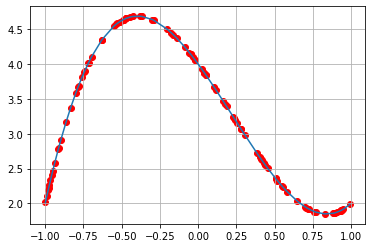

In [8]:
import numpy as np
import math
from tensorflow import keras
from matplotlib import pyplot as plt

#function = 3x^3 - 2x^2 - 3x + 4
def polynomial(x_array,a,b,c,d):
    x_array = np.asfarray(x_array)
    return a*x_array**3 + b*x_array**2 + c*x_array + d

#
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000) # dataset for training
x_valid = np.random.uniform(-1, 1, 100) #dataset for testing/validation
x_valid.sort()

a=3
b=-2
c=-3
d=4
y_target = polynomial(x_valid,a,b,c,d)

sigma = 0.0 # noise standard deviation
y_train = np.random.normal(polynomial(x_train,a,b,c,d), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(polynomial(x_valid,a,b,c,d), sigma)

plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True)
plt.show()

### Using model from Ex11.1
This section utilizes the linear model used in Exercise 11.1, just to prove that it should not function and another model must be defined for polynomials.

Model: "sequential_184"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_184 (Dense)            (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Test loss: 0.8131828904151917
Test accuracy: 0.8131828904151917



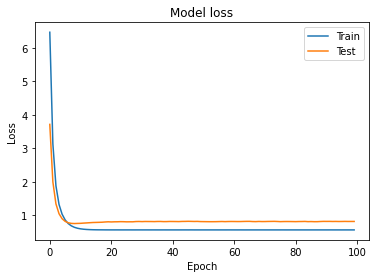

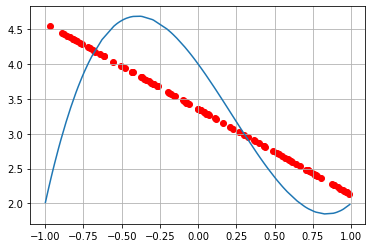

In [9]:
# Using model from ex11.1

# Load previous model for extension
oldmodel = keras.models.load_model('models/model_ex1')
oldmodel.summary()
print()

history = oldmodel.fit(x=x_train, y=y_train, 
    batch_size=32, epochs=100,
    shuffle=True, #
    validation_data=(x_valid, y_valid),
    verbose=0
)

score = oldmodel.evaluate(x_valid, y_valid, batch_size=32, verbose=0)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = oldmodel.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

### New model



In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K
from tensorflow.keras import callbacks
from tensorflow.keras import losses
from tensorflow.keras import activations
from tensorflow.keras.utils import get_custom_objects, plot_model 

def run(layers:list,optimizer='sgd',loss='mse',batch_size=32,epochs=60,show_summary=True,outputs=False,testing=True,graph=True,logger=True):
    global x_train, y_train, x_valid, y_valid, y_target
    model = models.Sequential(layers)
    model.compile(optimizer=optimizer, loss=loss, metrics=['mse'])
    optname = optimizer if isinstance(optimizer,str) else optimizer.__class__.__name__
    lossname = loss if isinstance(loss,str) else loss.__class__.__name__
    if logger:
        print(f"************** {len(layers)} Layers\t{layers[0].output_shape[1]} input neurons\t optimizer={optname}\tloss={lossname}")
    if show_summary:
        model.summary()
    
    history = model.fit(x=x_train, y=y_train, 
        batch_size=batch_size, epochs=epochs,
        shuffle=True, # a good idea is to shuffle input before at each epoch
        validation_data=(x_valid, y_valid),
        verbose=0
    )

    score = model.evaluate(x_valid, y_valid, batch_size=batch_size, verbose=0)
    if outputs:
        print()
        print("Validation performance")
        print('Test loss:', score[0])
        print('Test accuracy:', score[1])

    score = model.evaluate(x_valid, y_target, batch_size=batch_size, verbose=0)
    if outputs:
        print()
        print("Testing performance")
        print('Test loss:', score[0])
        print('Test accuracy:', score[1])
    
    if testing:
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('Model loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Test'], loc='best')
        plt.show()

    if graph:
        fig=plt.figure(figsize=(10, 5))
        x_predicted = np.random.uniform(-1.5, 1.5, 100)
        x_predicted.sort()
        y_predicted = model.predict(x_predicted)
        plt.scatter(x_predicted, y_predicted,color='r')
        plt.plot(x_predicted, polynomial(x_predicted,a,b,c,d))
        plt.title(f"{len(layers)} layers with {layers[0].output_shape[1]} input neurons  -  opt.= {optname}, loss = {lossname} ")
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    
    if logger:
        print("\n\n")

## <span style="color:green">Dependance on layers & neurons </span>
Using the code above, various NNs have been trained with different layers and neurons for each layer, to study the accuracy in approximating the polynomial in $[\frac{-3}{2},\frac{3}{2}]$

### Different Neural Networks


************** 2 Layers	500 input neurons	 optimizer=SGD	loss=mse
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 500)               1000      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 501       
Total params: 1,501
Trainable params: 1,501
Non-trainable params: 0
_________________________________________________________________


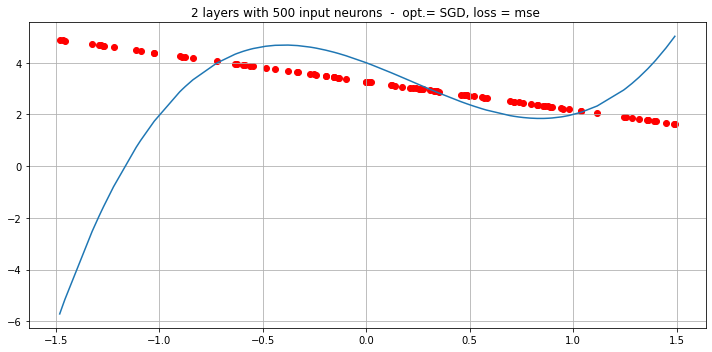




************** 3 Layers	1 input neurons	 optimizer=SGD	loss=mse
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_6 (Dense)              (None, 30)                60        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 31        
Total params: 93
Trainable params: 93
Non-trainable params: 0
_________________________________________________________________


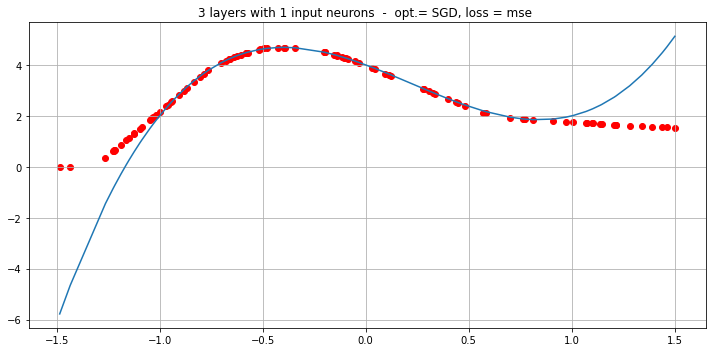




************** 3 Layers	500 input neurons	 optimizer=SGD	loss=mse
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 500)               1000      
_________________________________________________________________
dense_9 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 101       
Total params: 51,201
Trainable params: 51,201
Non-trainable params: 0
_________________________________________________________________

Validation performance
Test loss: 11.389304161071777
Test accuracy: 11.389304161071777

Testing performance
Test loss: 11.389304161071777
Test accuracy: 11.389304161071777


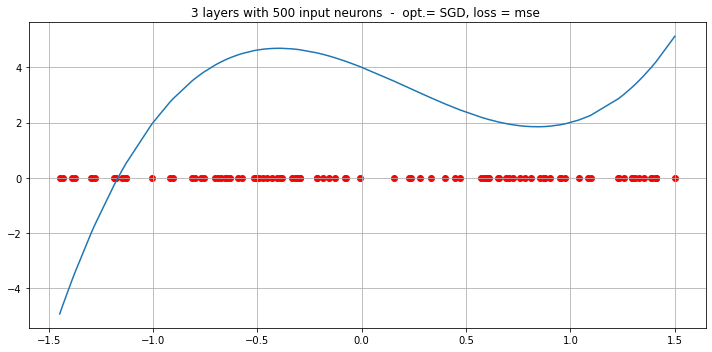




************** 5 Layers	500 input neurons	 optimizer=SGD	loss=mse
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 500)               1000      
_________________________________________________________________
dense_12 (Dense)             (None, 250)               125250    
_________________________________________________________________
dense_13 (Dense)             (None, 100)               25100     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 11        
Total params: 152,371
Trainable params: 152,371
Non-trainable params: 0
_________________________________________________________________


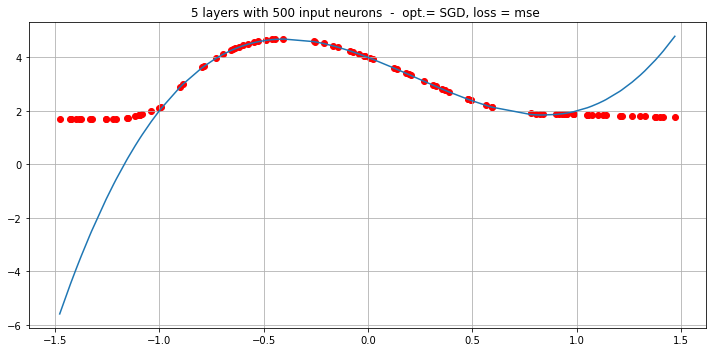




************** 7 Layers	1000 input neurons	 optimizer=sgd	loss=mse
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 1000)              2000      
_________________________________________________________________
dense_17 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_18 (Dense)             (None, 250)               125250    
_________________________________________________________________
dense_19 (Dense)             (None, 175)               43925     
_________________________________________________________________
dense_20 (Dense)             (None, 100)               17600     
_________________________________________________________________
dense_21 (Dense)             (None, 50)                5050      
__________________________________________________

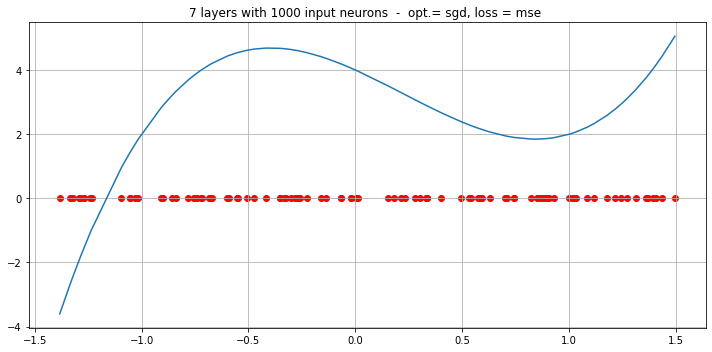

In [11]:
opt = optimizers.SGD(learning_rate=0.1)
run([layers.Dense(500,input_shape=(1,)),layers.Dense(1,activation="relu")],optimizer=opt,testing=False)
run([layers.Dense(1,input_shape=(1,)),layers.Dense(30,activation="relu"),layers.Dense(1,activation="relu")],optimizer=opt,testing=False)
run([layers.Dense(500,input_shape=(1,)),layers.Dense(100,activation="relu"),layers.Dense(1,activation="relu")],optimizer=opt,testing=False,outputs=True)
run([layers.Dense(500,input_shape=(1,)),layers.Dense(250,activation="relu"),layers.Dense(100,activation="relu"),layers.Dense(10,activation="relu"),layers.Dense(1,activation="relu")],optimizer=opt,testing=False)
run([layers.Dense(1000,input_shape=(1,)),layers.Dense(500,activation="relu"),layers.Dense(250,activation="relu"),layers.Dense(175,activation="relu"),layers.Dense(100,activation="relu"),layers.Dense(50,activation="relu"),layers.Dense(1,activation="relu")],testing=False)


### Results
Discuss results on layers/neurons

<br>

## <span style="color:green"> <strong> <u> Dependance on optimizers </u> </strong> </span>
The following section defines different optimizer functions for a Neural Network with 3 layers and 500 input neurons.

Which optimizers to chose<br>
Expectations<br>

### <u> <strong> Adam Optimizer </strong> </u>
Adam, short for adaptive moment estimation, is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iteratively based in training data.
Between the numerous advantages brought by this algorithm, the most important for this case are:
- Computationally efficient
- Straightforward to implement
- Appropriate for problems with very noisy/or sparse gradients


#### Different optimizers

************** 3 Layers	1 input neurons	 optimizer=SGD	loss=mse
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_24 (Dense)             (None, 50)                100       
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 51        
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________

Validation performance
Test loss: 0.004281164612621069
Test accuracy: 0.004281164612621069

Testing performance
Test loss: 0.004281164612621069
Test accuracy: 0.004281164612621069


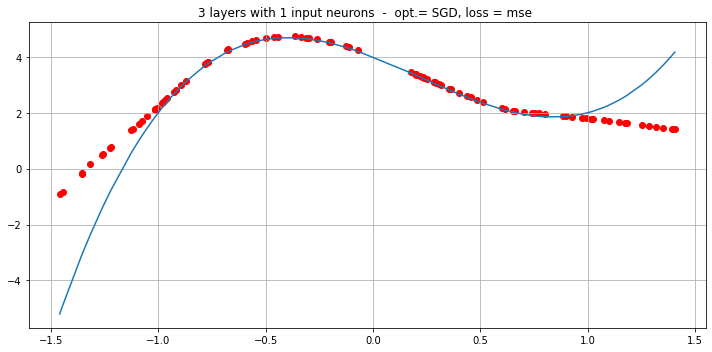




************** 3 Layers	1 input neurons	 optimizer=Adam	loss=mse
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_24 (Dense)             (None, 50)                100       
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 51        
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________

Validation performance
Test loss: 0.0030204462818801403
Test accuracy: 0.0030204462818801403

Testing performance
Test loss: 0.0030204462818801403
Test accuracy: 0.0030204462818801403


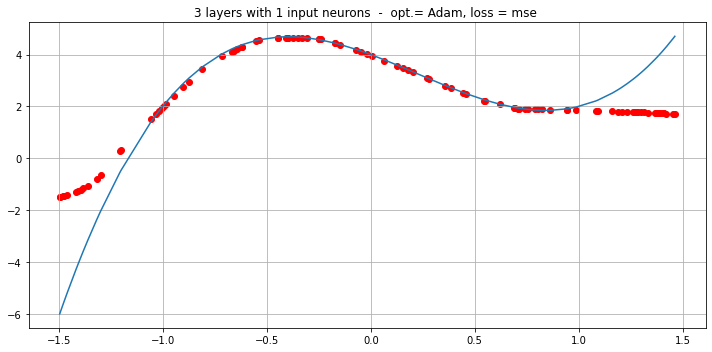




************** 3 Layers	1 input neurons	 optimizer=RMSprop	loss=mse
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_24 (Dense)             (None, 50)                100       
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 51        
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________

Validation performance
Test loss: 0.2902061939239502
Test accuracy: 0.2902061939239502

Testing performance
Test loss: 0.2902061939239502
Test accuracy: 0.2902061939239502


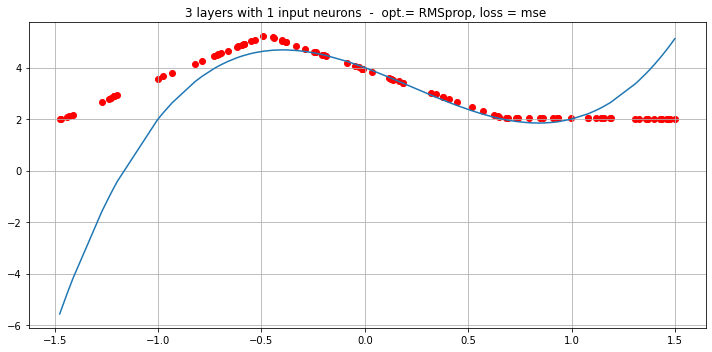




************** 3 Layers	1 input neurons	 optimizer=Adagrad	loss=mse
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_24 (Dense)             (None, 50)                100       
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 51        
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________

Validation performance
Test loss: 0.026821710169315338
Test accuracy: 0.026821710169315338

Testing performance
Test loss: 0.026821710169315338
Test accuracy: 0.026821710169315338


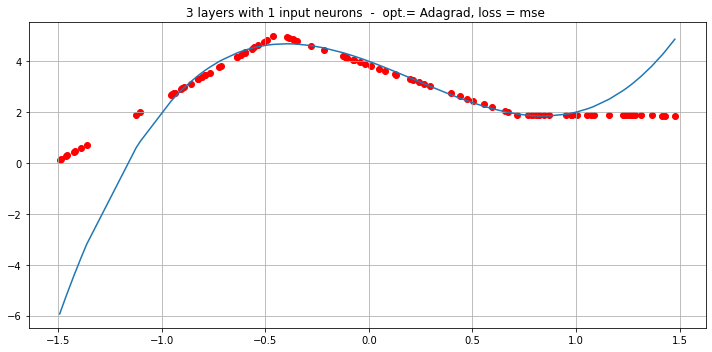

In [12]:
opt_layers = [
        layers.Dense(1,input_shape=(1,)),
        layers.Dense(50,activation="relu"),
        layers.Dense(1,activation="selu")
]
opts = [
    optimizers.SGD(learning_rate=1e-1),
    optimizers.Adam(learning_rate=1e-1),
    optimizers.RMSprop(learning_rate=1e-1),
    optimizers.Adagrad(learning_rate=1e-1)
]
for oo in opts:
    run(opt_layers,optimizer=oo,testing=False,batch_size=64,epochs=150,outputs=True)
print()

#### Learning rate
As with all optimization algorithms, it is defined by numerous parameters, including the learning rate, which determines the step size at each iteration while moving toward a minimum of a loss function.
In the following section, I will study the impact of the learning rate parameter on the learning efficiency of the model.
At first, I chose to explore three different values for the learning rate:<br>
<ul>
    <li> lr = 0.001 (default value for Adam optimizer) </li>
    <li> lr = 0.1</li>
    <li> lr = 0.00001</li>
</ul>
in order to choose values that could be too high, too low or decent.
Then I will use a learning rate schedule called "Step decay" which systematically drops the learning rate at specific times during training, formally defined by $$LR = LR_0 * \text{droprate}^{\text{floor}(\text{epoch} / \text{epochs_drop})}$$

---> Learning rate:  0.001
************** 3 Layers	500 input neurons	 optimizer=Adam	loss=mse
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 500)               1000      
_________________________________________________________________
dense_27 (Dense)             (None, 100)               50100     
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 101       
Total params: 51,201
Trainable params: 51,201
Non-trainable params: 0
_________________________________________________________________


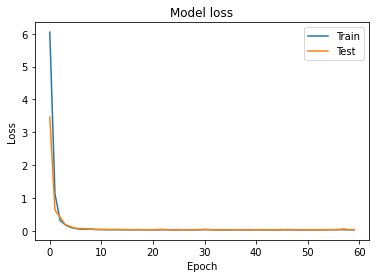

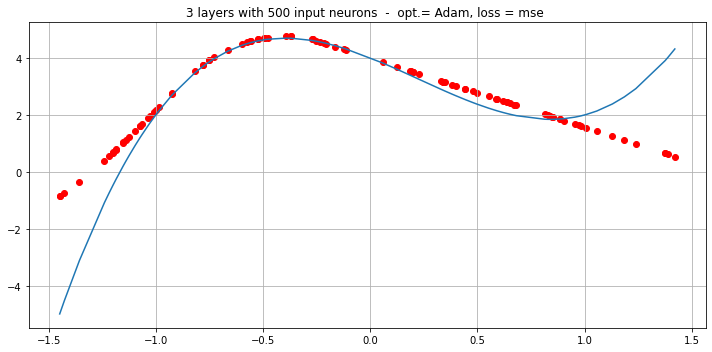

In [13]:
#--- LR = 0.001

lr = 0.001
adam1 = optimizers.Adam(
    learning_rate=lr,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam2"
)
print("---> Learning rate: ",lr)

run(
    [
        layers.Dense(500,input_shape=(1,)),
        layers.Dense(100, activation="relu"),
        layers.Dense(1)
    ],
    optimizer=adam1
)

---> Learning rate:  0.1
************** 3 Layers	500 input neurons	 optimizer=Adam	loss=mse
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 500)               1000      
_________________________________________________________________
dense_30 (Dense)             (None, 100)               50100     
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 101       
Total params: 51,201
Trainable params: 51,201
Non-trainable params: 0
_________________________________________________________________


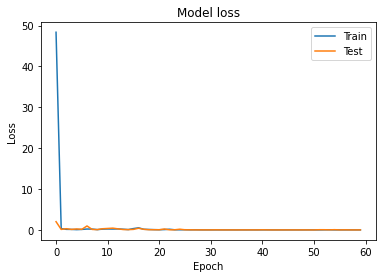

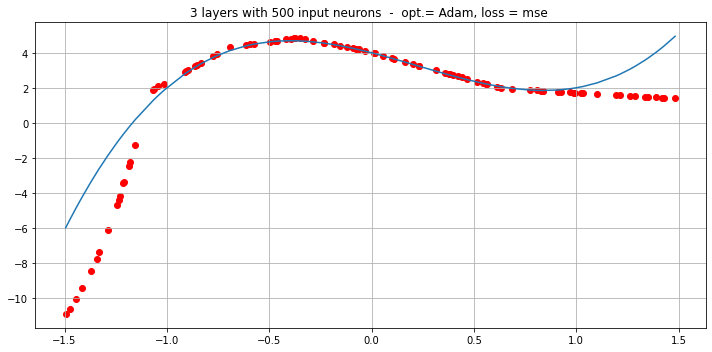

In [14]:
#--- LR = 0.1

lr = 0.1
adam1 = optimizers.Adam(
    learning_rate=lr,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam2"
)
print("---> Learning rate: ",lr)
run(
    [
        layers.Dense(500,input_shape=(1,)),
        layers.Dense(100, activation="relu"),
        layers.Dense(1)
    ],
    optimizer=adam1
)

---> Learning rate:  1e-05
************** 3 Layers	500 input neurons	 optimizer=Adam	loss=mse
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 500)               1000      
_________________________________________________________________
dense_33 (Dense)             (None, 100)               50100     
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 101       
Total params: 51,201
Trainable params: 51,201
Non-trainable params: 0
_________________________________________________________________


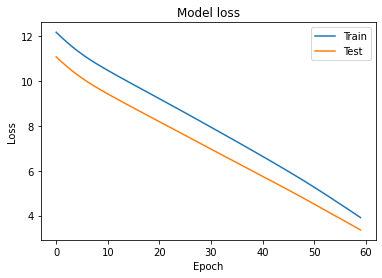

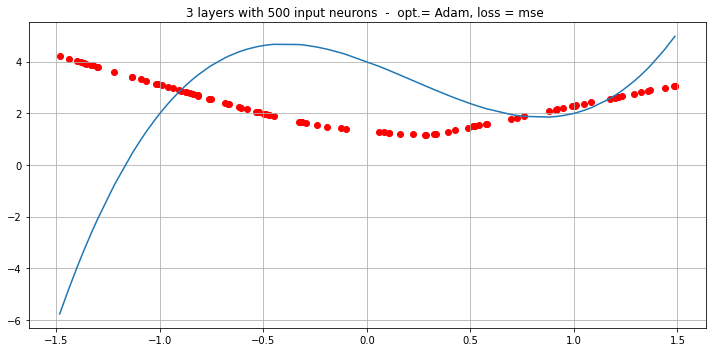

In [15]:
lr = 0.00001
adam1 = optimizers.Adam(
    learning_rate=lr,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam2"
)
print("---> Learning rate: ",lr)
run(
    [
        layers.Dense(500,input_shape=(1,)),
        layers.Dense(100, activation="relu"),
        layers.Dense(1)
    ],
    optimizer=adam1
)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 500)               1000      
_________________________________________________________________
dense_36 (Dense)             (None, 100)               50100     
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 101       
Total params: 51,201
Trainable params: 51,201
Non-trainable params: 0
_________________________________________________________________

Validation performance
Test loss: 0.012978918850421906
Test accuracy: 0.012978918850421906

Testing performance
Test loss: 0.012978918850421906
Test accuracy: 0.012978918850421906


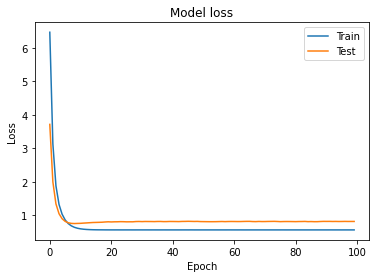

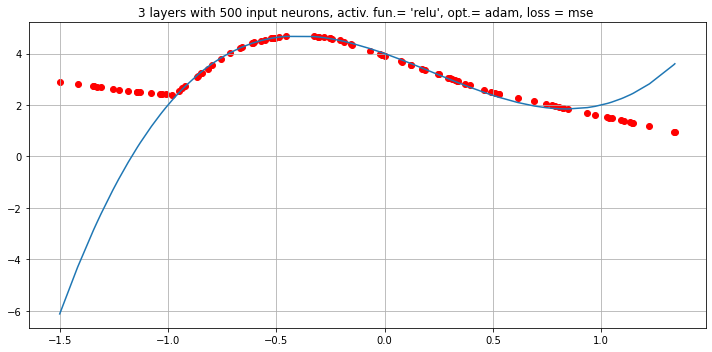


 Final learning rate:  4.6053665e-05


In [16]:
### Step decay
import math
initial_learning_rate = 0.01
def lr_step_decay(epoch, lr):
    drop_rate = 0.55
    epochs_drop = 10.5
    return initial_learning_rate * math.pow(drop_rate, math.floor(epoch/epochs_drop))


modellayers = [
    layers.Dense(500, input_shape=(1,)),
    layers.Dense(100, activation="relu"),
    layers.Dense(1)
]
stepmodel = models.Sequential(modellayers)
stepmodel.compile(optimizer="adam", loss="mse", metrics=['mse'])
stepmodel.summary()

# Fit the model to the training data
history_step_decay = stepmodel.fit(
    x_train, 
    y_train, 
    epochs=100, 
    validation_split=0.3,
    batch_size=64,
    callbacks=[callbacks.LearningRateScheduler(lr_step_decay, verbose=0)],
    verbose=0
)

score = stepmodel.evaluate(x_valid, y_valid, batch_size=64, verbose=0)
print()
print("Validation performance")
print('Test loss:', score[0])
print('Test accuracy:', score[1])

score = stepmodel.evaluate(x_valid, y_target, batch_size=64, verbose=0)
print()
print("Testing performance")
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

fig=plt.figure(figsize=(10, 5))
x_predicted = np.random.uniform(-1.5, 1.5, 100)
x_predicted.sort()
y_predicted = stepmodel.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_predicted, polynomial(x_predicted,a,b,c,d))
plt.title(f"{len(modellayers)} layers with 500 input neurons, activ. fun.= 'relu', opt.= adam, loss = mse ")
plt.grid(True)
plt.tight_layout()
plt.show()
print("\n Final learning rate: ",K.eval(stepmodel.optimizer.lr))

The choice of the value for learning rate can impact two things:
<ol>
    <li>How fast the algorithm learns</li>
    <li>Whether the cost function is minimized or not</li>
</ol>
For an optimal value of the learning rate, the cost function value is minimized in a few iterations. If your learning rate is too low, training will progress very slowly as the fine-tunings to the weights in the network are small, and the number of iterations/epochs required to minimize the cost function is high.<br>
If the learning rate is set too high, the cost function could saturate at a value higher than the minimum value, causing undesirable divergent behavior in the loss function.<br>


## <span style="color:green">Dependance on loss function </span>
In this section, I will try to explore the dependance of the model on the type of loss function.
For this purpose, I will keep all the other parameters as fixed as possible to highlight as much as possible the quested dependancy.<br>
The parameters are:
- A neural network with 3 layers, respectively with 500, 100 and 1 neuron, all following the ReLU activation function
- 100 epochs
- A batch size of 64
- SGD optimizer

The chosen loss functions are:
- Mean squared error (Regression Loss)
The average squared difference between the estimated values and the actual value: $\text{MSE}=\frac{1}{N}\sum_{i=1}^N(Y_i - <Y_i>)^2$
- Mean absolute error (Regression Loss)
The measure of errors between paired observations expressing the same phenomenon, including observed versus predicted.
$\text{MAE}=\frac{1}{N}\sum_{i=1}^N |Y_i - X_i|$
- Cross-entropy (Probabilistic Loss)
It measures the performance of a classification model whose output is a probability value between 0 and 1
- Poisson

************** 3 Layers	500 input neurons	 optimizer=SGD	loss=MeanSquaredError
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 500)               1000      
_________________________________________________________________
dense_39 (Dense)             (None, 250)               125250    
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 251       
Total params: 126,501
Trainable params: 126,501
Non-trainable params: 0
_________________________________________________________________

Validation performance
Test loss: 0.040039416402578354
Test accuracy: 0.040039416402578354

Testing performance
Test loss: 0.040039416402578354
Test accuracy: 0.040039416402578354


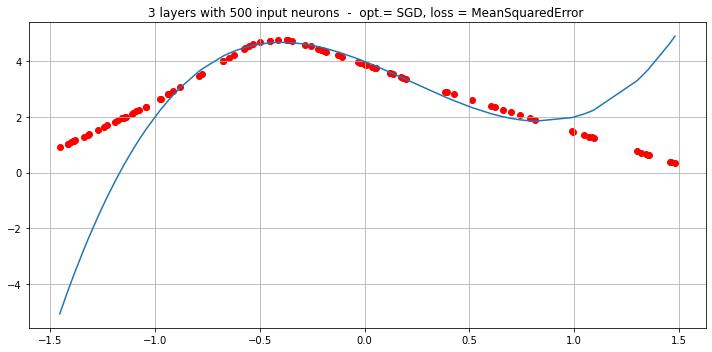




************** 3 Layers	500 input neurons	 optimizer=SGD	loss=MeanAbsoluteError
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 500)               1000      
_________________________________________________________________
dense_39 (Dense)             (None, 250)               125250    
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 251       
Total params: 126,501
Trainable params: 126,501
Non-trainable params: 0
_________________________________________________________________

Validation performance
Test loss: 0.15393522381782532
Test accuracy: 0.04049396142363548

Testing performance
Test loss: 0.15393522381782532
Test accuracy: 0.04049396142363548


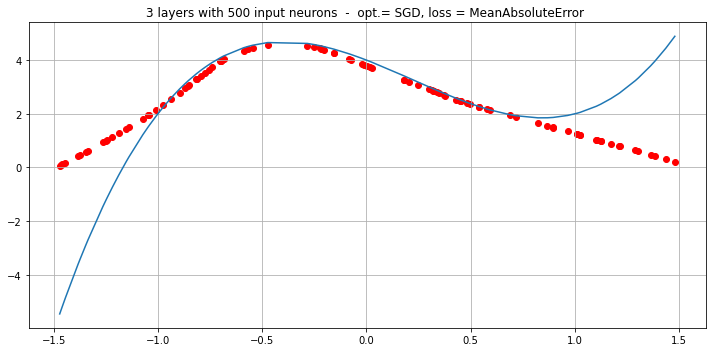




************** 3 Layers	500 input neurons	 optimizer=SGD	loss=CategoricalCrossentropy
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 500)               1000      
_________________________________________________________________
dense_39 (Dense)             (None, 250)               125250    
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 251       
Total params: 126,501
Trainable params: 126,501
Non-trainable params: 0
_________________________________________________________________

Validation performance
Test loss: 3.8415390690715867e-07
Test accuracy: 0.04049396142363548

Testing performance
Test loss: 3.8415390690715867e-07
Test accuracy: 0.04049396142363548


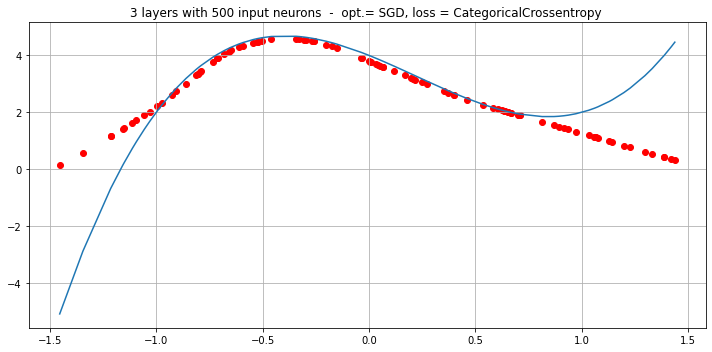




************** 3 Layers	500 input neurons	 optimizer=SGD	loss=Poisson
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 500)               1000      
_________________________________________________________________
dense_39 (Dense)             (None, 250)               125250    
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 251       
Total params: 126,501
Trainable params: 126,501
Non-trainable params: 0
_________________________________________________________________

Validation performance
Test loss: -0.7044781446456909
Test accuracy: 0.013807561248540878

Testing performance
Test loss: -0.7044781446456909
Test accuracy: 0.013807561248540878


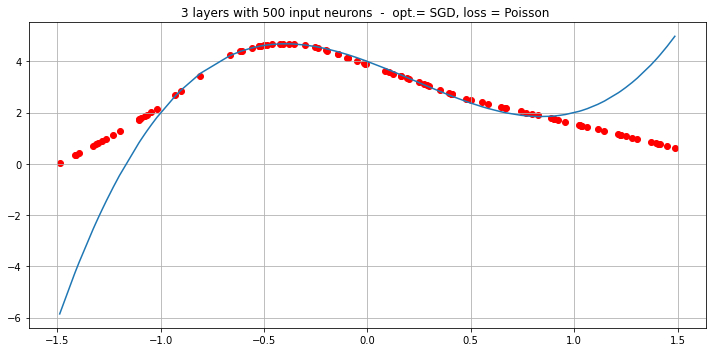

In [17]:
loss_functions = [
    losses.MeanSquaredError(),
    losses.MeanAbsoluteError(reduction="auto", name="mean_absolute_error"),
    losses.CategoricalCrossentropy(reduction="auto",name="categorical_crossentropy"),
    losses.Poisson(reduction="auto", name="poisson")
]
opt = optimizers.SGD(learning_rate=0.01)
ll = [
        layers.Dense(500,input_shape=(1,)),
        layers.Dense(250, activation="relu"),
        layers.Dense(1)
]

for func in loss_functions:
    run(ll,optimizer=opt,loss=func,testing=False,outputs=True,batch_size=64,epochs=100)

### Results
...

## <span style="color:green">Dependance on activation function </span>
Lastly, I reported a study on the dependance of the model on the activation function of the neurons. The structure of the Neural Network is defined by 4 layers, respectively with 500, 250, 100 and 1 neurons.<br>
The chosen activation functions are:
...



************** 4 Layers	500 input neurons	 optimizer=SGD	loss=MeanSquaredError
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 500)               1000      
_________________________________________________________________
dense_42 (Dense)             (None, 250)               125250    
_________________________________________________________________
dense_43 (Dense)             (None, 100)               25100     
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 101       
Total params: 151,451
Trainable params: 151,451
Non-trainable params: 0
_________________________________________________________________

Validation performance
Test loss: 0.009869810193777084
Test accuracy: 0.009869810193777084

Testing performance
Test loss: 0.009869810193777084
Test accuracy: 0.0098

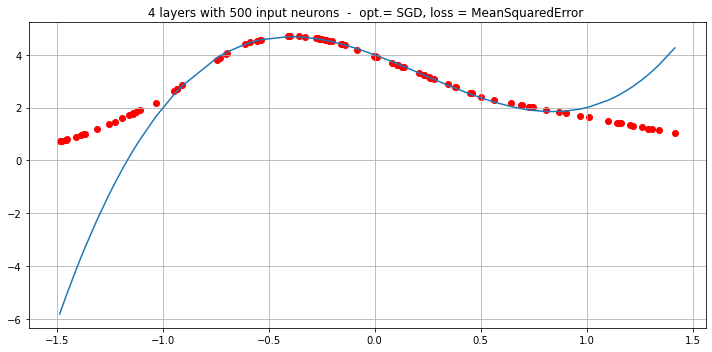




************** 4 Layers	500 input neurons	 optimizer=SGD	loss=MeanSquaredError
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 500)               1000      
_________________________________________________________________
dense_46 (Dense)             (None, 250)               125250    
_________________________________________________________________
dense_47 (Dense)             (None, 100)               25100     
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 101       
Total params: 151,451
Trainable params: 151,451
Non-trainable params: 0
_________________________________________________________________

Validation performance
Test loss: 5.9453125
Test accuracy: 5.9453125

Testing performance
Test loss: 5.9453125
Test accuracy: 5.9453125


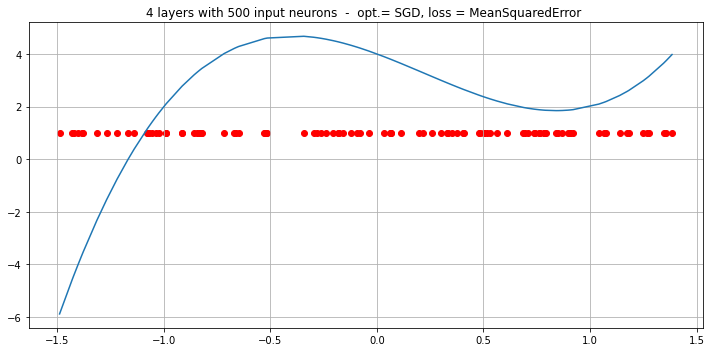




************** 4 Layers	500 input neurons	 optimizer=SGD	loss=MeanSquaredError
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 500)               1000      
_________________________________________________________________
dense_50 (Dense)             (None, 250)               125250    
_________________________________________________________________
dense_51 (Dense)             (None, 100)               25100     
_________________________________________________________________
dense_52 (Dense)             (None, 1)                 101       
Total params: 151,451
Trainable params: 151,451
Non-trainable params: 0
_________________________________________________________________

Validation performance
Test loss: 5.944271087646484
Test accuracy: 5.944271087646484

Testing performance
Test loss: 5.944271087646484
Test accuracy: 5.9442710876

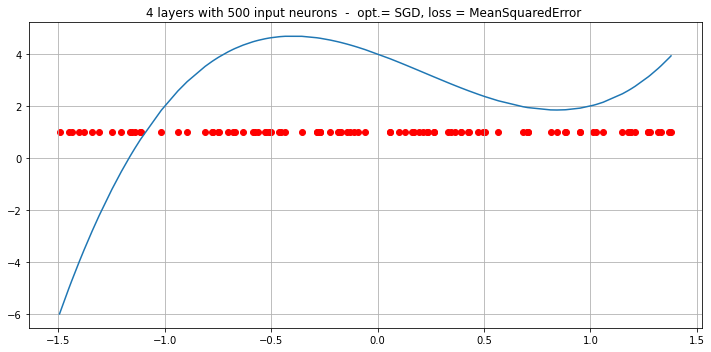

In [18]:
lossfunc = losses.MeanSquaredError()
opt = optimizers.SGD(learning_rate=0.01)
all_layers = [[
    layers.Dense(500, input_shape=(1,)),
    layers.Dense(250, activation="relu"),
    layers.Dense(100, activation="relu"),
    layers.Dense(1, activation="relu")
],[
    layers.Dense(500, input_shape=(1,)),
    layers.Dense(250, activation="relu"),
    layers.Dense(100, activation="relu"),
    layers.Dense(1, activation="sigmoid")
],[
    layers.Dense(500, input_shape=(1,)),
    layers.Dense(250, activation="selu"),
    layers.Dense(100, activation="selu"),
    layers.Dense(1, activation="softmax")
]
]

for l in all_layers:
    run(l,optimizer=opt,loss=lossfunc,testing=False,outputs=True,batch_size=64,epochs=100)

In [19]:
from IPython.display import clear_output

class PlotCurrentEstimate(callbacks.Callback):
    def __init__(self, x_valid, y_valid):
        """Keras Callback which plot current model estimate against reference target"""
        
        # convert numpy arrays into lists for plotting purposes
        self.x_valid = list(x_valid[:])
        self.y_valid = list(y_valid[:])
        self.iter=0

    def on_epoch_end(self, epoch, logs={}):
        
        temp = self.model.predict(self.x_valid, batch_size=None, verbose=False, steps=None)
        self.y_curr = list(temp[:]) # convert numpy array into list
        
        self.iter+=1
        if self.iter%10 == 0:
            clear_output(wait=True)            
            self.eplot = plt.subplot(1,1,1)
            self.eplot.clear()     
            self.eplot.scatter(self.x_valid, self.y_curr, color="blue", s=4, marker="o", label="estimate")
            self.eplot.scatter(self.x_valid, self.y_valid, color="red", s=4, marker="x", label="valid")
            self.eplot.legend()

            plt.show()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 1)                 2         
_________________________________________________________________
activation_4 (Activation)    (None, 1)                 0         
_________________________________________________________________
dense_57 (Dense)             (None, 40)                80        
_________________________________________________________________
activation_5 (Activation)    (None, 40)                0         
_________________________________________________________________
dense_58 (Dense)             (None, 1)                 41        
Total params: 123
Trainable params: 123
Non-trainable params: 0
_________________________________________________________________

Validation performance
Test loss: 0.022854315117001534
Test accuracy: 0.022854315117001534

Testing performance
Test los

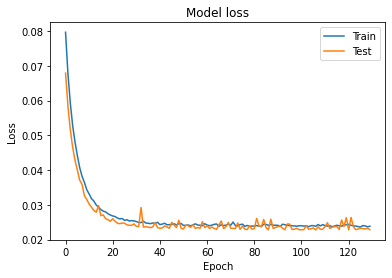

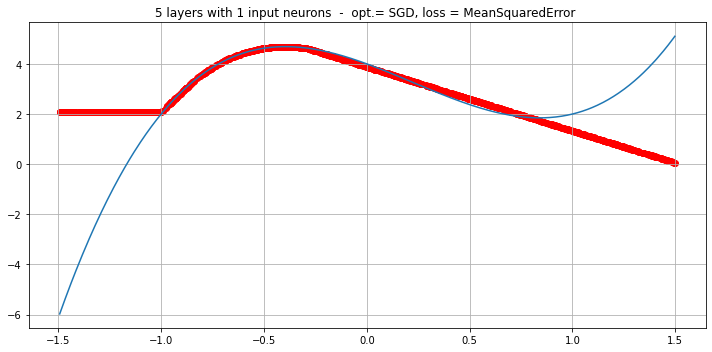

INFO:tensorflow:Assets written to: models/model_ex2/assets


In [21]:
np.random.seed(0)
finalx_train = np.random.uniform(-1, 1, 10000) # dataset for training
finalx_valid = np.random.uniform(-1, 1, 1000) #dataset for testing/validation
finalx_valid.sort()

finaly_target = polynomial(finalx_valid,a,b,c,d)

sigma = 0.0 # noise standard deviation
finaly_train = np.random.normal(polynomial(finalx_train,a,b,c,d), sigma) # actual measures from which we want to guess regression parameters
finaly_valid = np.random.normal(polynomial(finalx_valid,a,b,c,d), sigma)

finalmodel = models.Sequential()
finalmodel.add(layers.Dense(units=1, input_dim=1))
finalmodel.add(layers.Activation('relu'))
finalmodel.add(layers.Dense(units=40))
finalmodel.add(layers.Activation('relu'))
finalmodel.add(layers.Dense(units=1))
finalmodel.compile(loss='mean_squared_error',optimizer='adam', metrics=['mse'])
finalmodel.summary()

history = finalmodel.fit(x=finalx_train, y=finaly_train, 
    batch_size=64, epochs=150,
    shuffle=True, # a good idea is to shuffle input before at each epoch
    validation_data=(finalx_valid, finaly_valid),
    verbose=0
)

score = finalmodel.evaluate(finalx_valid, finaly_valid, batch_size=64, verbose=0)
print()
print("Validation performance")
print('Test loss:', score[0])
print('Test accuracy:', score[1])

score = finalmodel.evaluate(finalx_valid, finaly_target, batch_size=64, verbose=0)
print()
print("Testing performance")
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.plot(history.history['loss'][20:])
plt.plot(history.history['val_loss'][20:])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

fig=plt.figure(figsize=(10, 5))
finalx_predicted = np.random.uniform(-1.5, 1.5, 1000)
finalx_predicted.sort()
finaly_predicted = finalmodel.predict(finalx_predicted)
plt.scatter(finalx_predicted, finaly_predicted,color='r')
plt.plot(finalx_predicted, polynomial(finalx_predicted,a,b,c,d))
plt.title(f"{len(finalmodel.layers)} layers with {finalmodel.layers[0].output_shape[1]} input neurons  -  opt.= {opt.__class__.__name__}, loss = {lossfunc.__class__.__name__} ")
plt.grid(True)
plt.tight_layout()
plt.show()

finalmodel.save("models/model_ex2")

In [ ]:
plot_estimate = PlotCurrentEstimate(finalx_valid, finaly_valid)

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                  min_delta=0, patience=100, mode='auto')

model.fit(finalx_valid, finaly_valid, batch_size=32, epochs=150,
          validation_data=(finalx_valid, finalx_valid),
          callbacks=[ plot_estimate, earlystop]
          )

model.get_weights()